## Analyze A/B Test Results



## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability



In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

In [2]:
df=pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [4]:
df.user_id.nunique()

290584

The proportion of users converted.

In [57]:
df.converted.sum()/df.shape[0]

0.11965919355605512

The number of times the `new_page` and `treatment` don't match.

In [58]:
df.query("landing_page=='new_page' and group=='control'").shape[0]


1928

In [7]:
df.query("landing_page=='old_page' and group=='treatment'").shape[0]


1965

In [8]:
df2 =df.drop(df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].index,axis=0)
df2 =df.drop(df[((df['group'] == 'control') == (df['landing_page'] == 'old_page')) == False].index,axis=0)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]


0

In [10]:
df2[((df2['group'] == 'control') == (df2['landing_page'] == 'old_page')) == False].shape[0]


0

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [59]:
df2["user_id"].nunique()

290584

 repeated  **user_id** in **df2**. 

In [13]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


the row information for the repeat **user_id**

In [14]:
df2[df2.duplicated("user_id",keep="first")]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [15]:
df2=df2.drop_duplicates(subset='user_id', keep='first')

 the probability of an individual converting regardless of the page they receive

In [16]:
df2.converted.mean()

0.11959708724499628

the probability they converted Given that an individual was in the `control` group

In [60]:
df_control=df2.query("group=='control'")
ccr=df_control.converted.mean()
ccr

0.1203863045004612

the probability they converted Given that an individual was in the `treatment` group

In [61]:
df_treatment = df2.query("group =='treatment'")
tcr=df_treatment.converted.mean()
tcr

0.11880806551510564

In [19]:
obs_diff = tcr-ccr
obs_diff

-0.0015782389853555567

the probability that an individual received the new page

In [20]:
df2[df2['landing_page']=='new_page'].shape[0]/df2.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

* the conversion rate regardless of the page they receive is 0.1195
* conversion rate  in the control group is 0.1204
* conversion rate in the treatment group with New Page is 0.1188
* since there is no difference in conversion rates then we can't  say the new treatment page leads to more conversions or not.


H0:pnew−pold≤0
 
H1:pnew−pold>0

the **conversion rate** for $p_{new}$ under the null

In [21]:
P_new=df2.converted.mean()

 the **conversion rate** for $p_{old}$ under the null<br><br>

In [22]:
P_old=df2.converted.mean()

$n_{new}$, the number of individuals in the treatment group

In [23]:
n_new=df2.query("group =='treatment'").shape[0]

 $n_{old}$, the number of individuals in the control group

In [24]:
n_old=df2.query("group =='control'").shape[0]

In [25]:
1-0.1196

0.8804

In [26]:
new_page_converted = np.random.choice([0,1], size=n_new, p=[1-P_new , P_new])


In [27]:
old_page_converted = np.random.choice([0,1], size=n_old, p=[1-P_old , P_old])


In [28]:
new_page_converted.mean() - old_page_converted.mean()

0.0011333743444326555

In [29]:
p_diffs=[]
for _ in range(10000):
    new_page_converted = np.random.choice([0,1], size=n_new, p=[1-P_new , P_new])
    old_page_converted = np.random.choice([0,1], size=n_old, p=[1-P_old , P_old])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

Text(0.5,1,'p_diffs Distribution')

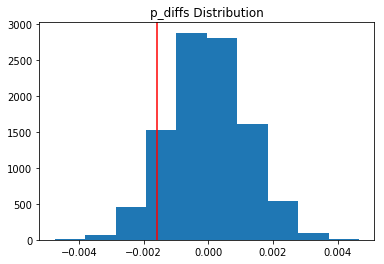

In [30]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs);
plt.axvline(x=obs_diff, color='r')
plt.title('p_diffs Distribution')

 proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**

In [31]:
(p_diffs > obs_diff).mean()

0.90559999999999996

I have computed the p-value wich is the probability that if the null hypothesis  ( P_new - P_old)<=0 were true , sampling variation would prouduce ( P_new - P_old)>0 , since p-value=90% > .05 then we fail to reject Ho wich means the convertion rate of new page is not greater than the old page. 

In [32]:
df2.query('landing_page == "old_page" and converted == 1').shape[0]

17489

In [33]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" and converted == 1').shape[0]
convert_new = df2.query('landing_page == "new_page" and converted == 1').shape[0]
n_old = df2.query('landing_page == "old_page"').shape[0]
n_new = df2.query('landing_page == "new_page"').shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [34]:
z , Pvalue =sm.stats.proportions_ztest([convert_old,convert_new],[n_old,n_new])
z , Pvalue

(1.3109241984234394, 0.18988337448195103)

In [35]:
import scipy.stats as st
st.norm.ppf(.95)

1.6448536269514722

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

since z=1.31<1.644 it means that the p>alpha.we fail to rejict Ho . it has the same previous  findings 

<a id='regression'></a>
### Part III - A regression approach
###  logistic regression model
`

In [36]:
df3=df2.copy()

In [37]:
df3['intercept'] = 1

df3[['new_page','old_page']] = pd.get_dummies(df3['landing_page'])
df3['ab_page'] = pd.get_dummies(df3['group'])['treatment']

In [38]:
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0


In [62]:
import statsmodels.api as sm
m = sm.Logit(df3['converted'], df3[['intercept', 'ab_page']]).fit()
m.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 08 Nov 2019   Pseudo R-squ.:               8.077e-06
Time:                        10:47:58   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

#### Ho: regression coefficient = 0
#### Hl: regression coefficient != 0
#### since p value= 0.19 > .05 we fail to reject Ho, which means that the page is insignificant in predicting the convertion.

#### since page is not good as explanatory variable we need to have other factor in the model that is significant in predicting the respons variable 

In [41]:
import pandas as pd
country= pd.read_csv("countries.csv")
df4=df3.set_index('user_id').join(country.set_index("user_id"))
df4.head()

,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,country
user_id,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0,US
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0,US
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1,US
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0,US


In [42]:
df4[['CA','UK','US']]=pd.get_dummies(df4['country'])
df4.head()


,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,country,CA,UK,US
user_id,,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0,US,0,0,1
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0,US,0,0,1
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,US,0,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1,US,0,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0,US,0,0,1


In [43]:
m = sm.Logit(df4['converted'], df4[['intercept','ab_page','US','UK']])
result = m.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 08 Nov 2019   Pseudo R-squ.:               2.323e-05
Time:                        09:39:44   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
==============================================================================
"""

In [48]:
np.exp(-0.0149), np.exp(0.0408), np.exp(0.0506)

(0.9852104557227469, 1.0416437559600236, 1.0519020483004984)

* treatment pages convert is  0.985 times as likly holding all else constant
* users from US are 1.04164 times as likely to convert holding all else constant
* users from UK are 1.0519 times as likely to convert holding all else constant
since all p values are grater than .05 except p value of UK then only UK is significant in predicting the convertion 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [52]:
df5 = df4.copy()


In [54]:
df5['UK_ab_page'] = df5['ab_page'] * df5['UK'] 
df5['US_ab_page'] = df5['ab_page'] * df5['US']

df5.head()

,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,country,CA,UK,US,UK_ab_page,US_ab_page
user_id,,,,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0,US,0,0,1,0,0
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0,US,0,0,1,0,0
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,US,0,0,1,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1,US,0,0,1,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0,US,0,0,1,0,0


In [56]:
m = sm.Logit(df5['converted'], df5[['intercept','ab_page','US','UK','UK_ab_page','US_ab_page']])
result = m.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Fri, 08 Nov 2019   Pseudo R-squ.:               3.482e-05
Time:                        10:05:07   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
UK_ab_page     0.0783      0.057      1.378      0.168      -0.033       0.190
US_ab_page     0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

* non of the p-values are significant 


<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [45]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0